In [27]:
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
working_df = pd. read_csv('modules/maintenance.csv')

In [28]:
grouped_multiple = working_df.groupby(['Company Name','Meta data', 'Processor', 'RAM', 'Graphic card', 'Hard disk']).agg({'Price': ['max', 'mean', 'min']})
grouped_multiple.columns  = ['Price_max', 'Price_mean', 'Price_min']
grouped_multiple.reset_index(inplace = True)
grouped_multiple = grouped_multiple[['Company Name','Meta data','Price_max','Price_mean', 'Price_min']]
grouping_t = working_df.groupby(['Company Name','Meta data', 'Processor', 'RAM', 'Graphic card', 'Hard disk']).groups

In [29]:
def list_choices(df):
    counter = 1
    choice_dict = {}
    for choice in list(df['Meta data'].unique()):
        choice_dict[counter] = choice
        print(f"{counter}. {choice}")
        counter += 1
    return  choice_dict

1. ['acer', 'nitro 5', '15.6" fhd gaming laptop', 'black']
2. ['acer', 'predator helios 300', '15.6" fhd 165hz gaming laptop']
3. ['acer', 'predator helios 300', '15.6" qhd 240hz gaming laptop']
4. ['acer', 'predator triton 300 se', '14” 165hz creator/gaming laptop', 'gray']
5. ['acer', 'nitro 5 17.3" full hd ips 144hz gaming laptop']
6. ['acer', 'predator triton 300 se', '14” oled 90hz creator/gaming laptop']
7. ['acer', 'predator triton 500 se 16" 2560x1600 165hz laptop']
8. ['acer', 'predator helios 300 gaming laptop', '15.6" qhd 240hz ips']
9. ['acer', 'nitro 5', 'gaming laptop', '15.6" fhd']
10. ['acer', 'swift 3', '14” 2560x1400 100% srgb  lntel evo laptop', 'silver']
11. ['acer', 'predator helios 300 15.6" gaming laptop', '1tb hard drive', 'obsidian black']
Price_distribution for ['acer', 'predator helios 300', '15.6" qhd 240hz gaming laptop'] is ...


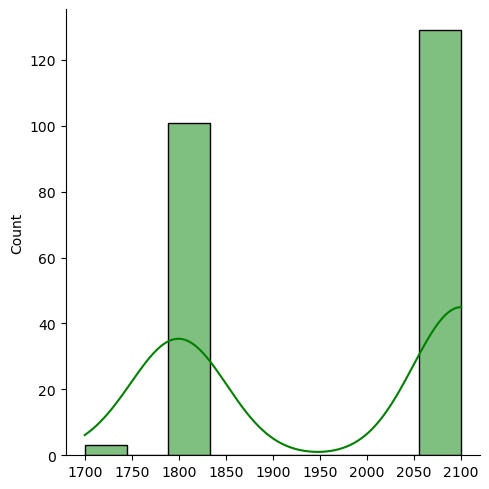

In [40]:
import matplotlib.pyplot as plt
working_df = pd. read_csv('modules/maintenance.csv')
company_name = input("Please input the company name you wish to check stats for")
companies = list(working_df['Company Name'].unique())
if company_name.lower() in companies:
    company_df = working_df.loc[working_df['Company Name'] == company_name]
    choices_dict = list_choices(company_df)
    time.sleep(1)
    model = input("Please enter the choice for the model needed")
    model_name = choices_dict[int(model)]
    print(f"Price_distribution for {model_name} is ...")
    company_prices = company_df.loc[company_df['Meta data'] == model_name, 'Price'].tolist()
sns.displot(company_prices, kde = True, color= 'g')
plt.show()

In [43]:
#working_df.columns
working_df.fillna("None", inplace= True)
working_df['Processor Chip'].value_counts()

i7         7560
ryzen 9    4501
i5         3013
i9         2337
ryzen 7    2248
ryzen 5     918
None        358
celeron      31
Name: Processor Chip, dtype: int64

In [37]:
working_df.loc[working_df['Processor'] == 'nvidia intel geforce rtx 3050 uhd graphics']

,Unnamed: 0,Company Name,Meta data,Processor,RAM,Graphic card,Hard disk,Price,Date,Time
49,50,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,09/03/2022,15:30:00
164,165,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,09/04/2022,18:30:00
349,350,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,09/07/2022,17:30:00
439,440,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,09/07/2022,18:30:00
529,530,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,09/07/2022,21:30:00
...,...,...,...,...,...,...,...,...,...,...
16431,17068,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,10/02/2022,11:30:00
16520,17158,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,10/02/2022,12:30:00
16609,17248,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,10/02/2022,13:30:00
16698,17338,asus,"['asus', 'gaming f17 fx706 17.3"" gaming laptop...",nvidia intel geforce rtx 3050 uhd graphics,8 gb memory,NaN,NaN,842.99,10/02/2022,14:30:00
